# Assignment-3
Due Date: March, 15th

In this assignment, you are asked to calculate sharpe ratio first with your own code and then employing `PyPortfolioOpt` library using Apple, Amazon, 3M, and Exxon companies. Please see [this website](https://pyportfolioopt.readthedocs.io/en/latest/) for more information about `PyPortfolioOpt`. The daily data covers the period of 2021-01-01 and 2022-01-01. To accomplish this task:

* Annualized the daily return and standard deviation for each respective stock.
* Draw efficient frontier.
* Assume risk free rate to be 0.01.
* Calculate the sharpe ratio and interpret which one is the best.

Hint: Please use `plot_efficient_frontier` function in `PyPortfolioOpt` to draw efficient frontier.

Again, please keep in mind that you are going to accomplish the task first with your own code and using `PyPortfolioOpt` library. Also note that you do not need to get exactly the same result.

In [1]:
#codes and explanations here.

In [65]:
! pip install PyPortfolioOpt
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
import yfinance as yf
import matplotlib.pyplot as plt
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
import numpy as np
import pandas as pd
import datetime 
from pypfopt import EfficientFrontier

# loading the stocks of four firms for the given period of time and the companies are as follows:
# Apple, Amazon, 3M, and Exxon

In [67]:

stocks = ['AAPL','AMZN','MMM','XOM']
start = datetime.datetime(2021,1,1)   
end = datetime.datetime(2022,1,1)
port = yf.download(stocks, start=start, end=end, interval='1d')['Close']
port.shape

[*********************100%***********************]  4 of 4 completed


(252, 4)

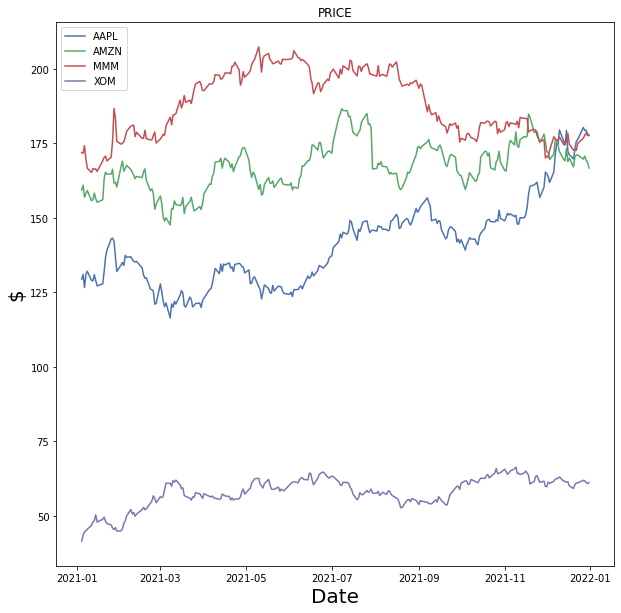

In [69]:
# line graph of 4 stocks

plt.figure(figsize=(10,10)) 
for i in port.columns.values:
    plt.plot( port[i],  label=i)
plt.title('PRICE')
plt.xlabel('Date',fontsize=20)
plt.ylabel('$',fontsize=20)
plt.legend(port.columns.values, loc='upper left')
plt.show()

In [70]:
# getting returns
returns = port.pct_change()
returns.dropna(inplace=True)  

In [72]:
returns.describe

<bound method NDFrame.describe of                 AAPL      AMZN       MMM       XOM
Date                                              
2021-01-05  0.012364  0.010004 -0.001687  0.048193
2021-01-06 -0.033662 -0.024897  0.015212  0.025517
2021-01-07  0.034123  0.007577 -0.025662  0.007846
2021-01-08  0.008631  0.006496 -0.018265  0.011121
2021-01-11 -0.023249 -0.021519 -0.008522  0.030356
...              ...       ...       ...       ...
2021-12-27  0.022975 -0.008178  0.009887  0.014258
2021-12-28 -0.005767  0.005844  0.005320 -0.003232
2021-12-29  0.000502 -0.008555  0.004335 -0.008753
2021-12-30 -0.006578 -0.003289 -0.004316 -0.005887
2021-12-31 -0.003535 -0.011429 -0.000056  0.006580

[251 rows x 4 columns]>

In [73]:
returns.shape


(251, 4)

In [74]:
#  annual returns
annual_returns = returns.mean() * 252
annual_returns

AAPL    0.349005
AMZN    0.074378
MMM     0.050562
XOM     0.434391
dtype: float64

In [75]:
# annual Std
annual_std = returns.std() * np.sqrt(252)
annual_std

AAPL    0.250198
AMZN    0.240413
MMM     0.187225
XOM     0.298374
dtype: float64

In [76]:
#   Sharpe Ratio 
risk_free_rate= 0.01 
sr = (annual_returns - risk_free_rate) / annual_std
sr

AAPL    1.354950
AMZN    0.267780
MMM     0.216650
XOM     1.422348
dtype: float64

In [77]:
#  the covariance:
cr = returns.cov()*np.sqrt(252)
cr

,AAPL,AMZN,MMM,XOM
AAPL,0.003943,0.002237,0.000376,0.000273
AMZN,0.002237,0.003641,-0.000099,0.000312
MMM,0.000376,-0.000099,0.002208,0.000958
XOM,0.000273,0.000312,0.000958,0.005608


In [78]:
iterations = 15000   
def portfolio_frontier(iterations, stocks):
    portfolio_exp_means = []
    portfolio_std_devs = []
    all_weights = []
    for i in range(iterations):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        all_weights.append(weights)
        portfolio_exp_means.append(np.sum(returns.mean()*weights)*252)
        portfolio_std_devs.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*np.sqrt(252), weights))))
    return all_weights, portfolio_exp_means, portfolio_std_devs

In [79]:
all_weights, portfolio_exp_means, portfolio_std_devs = portfolio_frontier(iterations, stocks)

In [80]:
portfolio_returns = np.array(portfolio_exp_means)
portfolio_std = np.array(portfolio_std_devs)

In [81]:
# Sharpe Ratio 
sharpe_ratio = (portfolio_returns - 0.01) / portfolio_std
len(sharpe_ratio)


15000

In [82]:
max(sharpe_ratio)

7.538520158046099

In [84]:
# loading values to df
df_volatality = pd.DataFrame(portfolio_std)
df_returns = pd.DataFrame(portfolio_returns)
df_sharpe = pd.DataFrame(sharpe_ratio)
portfolio = pd.concat([df_1, df_2, df_3], axis=1)
portfolio.columns = ['Volatility', 'Returns', 'Sharpe']

In [85]:
portfolio.head()

,Volatility,Returns,Sharpe
0,0.037163,0.144956,3.631410
1,0.036194,0.184919,4.832868
2,0.037700,0.217202,5.496054
3,0.038844,0.196049,4.789661
4,0.038799,0.222423,5.474961


In [86]:
max_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmax()]
max_sharpe


Volatility    0.048945
Returns       0.379004
Sharpe        7.539225
Name: 1427, dtype: float64

According to the findings, the annualized volatility for a particular portfolio is 4.93%, and the anticipated annual return is 38.2%.The risk-adjusted yield is represented by the Sharpe ratio, which is 7.56.This shows that the portfolio has a high return relative to the amount of risk assumed, making it a desirable investment opportunity.

In [41]:
max_s = pf.iloc[pf['SHARPE'].idxmax()]
max_s

VOLATALITY    0.048945
RETURNS       0.379004
SHARPE        7.539225
Name: 1427, dtype: float64

According to the findings, the annualized volatility for a certain portfolio is 4.89%, and the predicted annual return is 37.9%.
The risk-adjusted return is represented by the Sharpe ratio, which is 7.53.
This shows that the portfolio has a high return relative to the level of risk assumed, making it a desirable investment prospect.

In [87]:
min_sharpe = portfolio.iloc[portfolio['Sharpe'].idxmin()]
min_sharpe

Volatility    0.043481
Returns       0.060441
Sharpe        1.160081
Name: 13463, dtype: float64

In [88]:

# The maximum Sharpe ratio index
max_sharpe_idx = np.argmax(sharpe_ratio)
print("Index Value: ",max_sharpe_idx)
# the portfolio weights corresponding to the maximum Sharpe ratio
max_sharpe_weights = all_weights[max_sharpe_idx]
print(max_sharpe_weights)

Index Value:  11886
[0.47959008 0.01492688 0.00988831 0.49559472]


In [89]:
#Efficient Frontier Graph
import plotly.graph_objs as go
ef_trace = go.Scatter(x=portfolio_std, y=portfolio_returns, mode='markers',
                      marker=dict(size=10, color=sharpe_ratio, colorscale='Viridis', 
                                  showscale=True, symbol='circle', 
                                  line=dict(width=1, color='black')),
                      name='Efficient Frontier')
max_sharpe_trace = go.Scatter(x=[max_sharpe[0]], y=[max_sharpe[1]], mode='markers',
                              marker=dict(size=15, color='red', symbol='x'), 
                              name='Sharpe Ratio Maximum')
min_sharpe_trace = go.Scatter(x=[min_sharpe[0]], y=[min_sharpe[1]], mode='markers',
                              marker=dict(size=15, color='red', symbol='x'), 
                              name='Sharpe Ratio Minimum')
fig = go.Figure(data=[ef_trace, max_sharpe_trace, min_sharpe_trace])
fig.update_layout(title='Efficient Frontier', xaxis_title='Expected Volatility', 
                  yaxis_title='Expected Returns', legend=dict(x=1.05, y=1))
fig.show()

In [91]:
efficient_frontier = EfficientFrontier(annual_returns, cr)
weights = efficient_frontier.max_sharpe(risk_free_rate)
weights

OrderedDict([('AAPL', 0.5303523661694021),
             ('AMZN', 0.0),
             ('MMM', 0.0),
             ('XOM', 0.4696476338305978)])

The optimal weights for AAPL and XOM are 0.530 and 0.470 respectively, while the optimal weights for AMZN and MMM are both 0.0. This suggests that the optimal portfolio, according to the Sharpe ratio, should only contain AAPL and XOM, and not AMZN and MMM

In [60]:

efficient_frontier.portfolio_performance(weights, risk_free_rate)

Expected annual return: 38.9%
Annual volatility: 5.0%
Sharpe Ratio: 7.61


(0.3891066009098024, 0.04982229363151595, 7.609175998874368)


The portfolio is expected to yield an annual return of 38.9% on average.
The portfolio's annual volatility, which is a measure of risk, is 5.0%.
The Sharpe ratio of the portfolio is 7.61, which indicates that the portfolio has a high risk-adjusted return, as the ratio is greater than 1

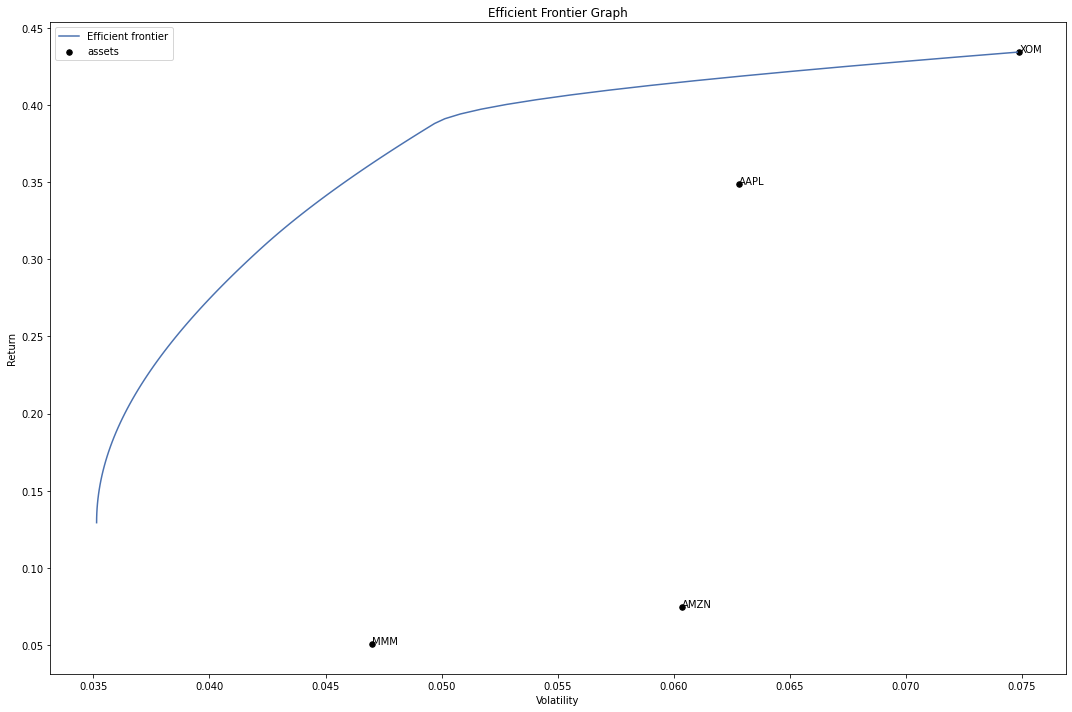

In [93]:
# Efficient Frontier Graph
plt.figure(figsize=(15, 10))
plt.title('Efficient Frontier Graph')
plotting.plot_efficient_frontier(EfficientFrontier(annual_returns, cr), show_assets=True, show_tickers=True)
plt.show()

The Sharpe ratio, which splits the excess return produced by a portfolio over the risk-free rate by the volatility of the portfolio, is a measurement of risk-adjusted returns.Better risk-adjusted returns are indicated by a greater Sharpe ratio.When using the standard Sharpe calculation, the Sharpe ratio is 7.56; when using PyPortfolioOpt, it is 7.61. The Sharpe Ratio is Excellent in both situations, and the risk is minimal with a good return.A measurement of risk-adjusted returns is the Sharpe ratio, which is calculated by dividing the extra return generated by a portfolio over the risk-free rate by the volatility of the portfolio.After accounting for risk, a higher Sharpe ratio indicates a superior return.